<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/python/pylint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pylint

A tool to check your Python code. Pylint helps to make your code standardized, pythonic and more beautiful.

*pylint* command line tool should be installed manualy, it is not part of the standard Python installation kit.

The next line will install *pylint* on Colab. To install it on your own machine enter the next command in a command/shell window without the exclamation mark (!).

---
**NOTE**

This is only a short introduction how to use *Pylint*. For further information see the [Pylint User Manual](https://pylint.pycqa.org/en/latest/).
---

In [ ]:
!python -m pip install pylint

     |████████████████████████████████| 414 kB 25.2 MB/s 
     |████████████████████████████████| 254 kB 43.1 MB/s 
     |████████████████████████████████| 103 kB 40.8 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 843 kB 54.4 MB/s 


Let's check the installation.

In [ ]:
!pylint

Usage: pylint [options]

Options:
  -h, --help            show this help message and exit
  --long-help           more verbose help.

  Master:
    --init-hook=<code>  Python code to execute, usually for sys.path
                        manipulation such as pygtk.require().
    -E, --errors-only   In error mode, checkers without error messages are
                        disabled and for others, only the ERROR messages are
                        displayed, and no reports are done by default.
    -v, --verbose       In verbose mode, extra non-checker-related info will
                        be displayed.
    --enable-all-extensions
                        Load and enable all available extensions. Use --list-
                        extensions to see a list all available extensions.
    --ignore=<file>[,<file>...]
                        Files or directories to be skipped. They should be
                        base names, not paths. [current: CVS]
    --ignore-patterns=<pattern>[,<pat

As many other command line tools, Pylint echos the usage information to the user if it is started without any command line parameters.

Let's download sample program and data.

In [ ]:
!wget -O sample_data/lidar.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/data_processing/lessons/code/lidar.txt
!wget -O vslide1.py https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/data_processing/lessons/code/vslide1.py

--2022-03-09 14:00:44--  https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/data_processing/lessons/code/lidar.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1480502 (1.4M) [text/plain]
Saving to: ‘sample_data/lidar.txt’

sample_data/lidar.t 100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2022-03-09 14:00:44 (95.4 MB/s) - ‘sample_data/lidar.txt’ saved [1480502/1480502]

--2022-03-09 14:00:44--  https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/data_processing/lessons/code/vslide1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

We coppied the source file into the next code block.

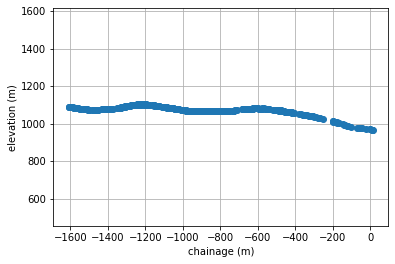

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
from math import hypot
import numpy as np
from matplotlib import pyplot as plt

def vplain(x1, y1, x2, y2):
    """ set up line equation
    vp[0] * x + vp[1] * y + vp[2] = 0

    x1, y1 - horizontal coordinates of the start point of the section
    x2, y2 - horizontal coordinates of the end point of the section
    returns a numpy array with coefficients of the vertical plane
    """

    vp = np.zeros((3,))
    vp[0] = y1 - y2
    vp[1] = x2 - x1
    vp[2] = x1 * y2 - x2 * y1
    vp = vp / hypot(vp[0], vp[1]) # normalize
    return vp

def section(pc, x1, y1, x2, y2, tol):
    """ Select point from a point cloud near to a line

    pc - point cloud in a numpy array
    x1, y1 - horizontal coordinates of the start point of the section
    x2, y2 - horizontal coordinates of the end point of the section
    tol - tolerance distance from the section
    returns a numpy array with points near to the section
    """
    pc1 = pc.copy()
    pc1[:, 2] = 1 # change to homogenous coordinates
    vp = vplain(x1, y1, x2, y2) # equation of vertical plain
    sec = pc[np.abs(np.dot(pc1, vp)) < tol] # select points close to the section

    return sec

def tr(e1, n1, e2, n2):
    """ set up transformation matrix for homogenous coordinates

    Parameters:
    e1, n1 - start point of the section line
    e2, n2 - end point of the section section line
    returns the transformation matrix
    """
    de = e2 - e1
    dn = n2 - n1

    d = hypot(de, dn) # distance
    r = de / d # sin
    m = dn / d # cos
    return np.dot(np.array([[1, 0, 0], [0, 1, 0], [-e1, -n1, 1]]),
                np.array([[m, r, 0], [-r, m, 0], [0, 0, 1]]))

if len(sys.argv) < 7:
  pc = np.loadtxt('sample_data/lidar.txt', delimiter=',') ;# load point cloud
  x1 = 548060.0
  y1 = 5129130.0
  x2 = 255130.0
  y2 = 5129030.0
  tol = 1.0
else:
    pc = np.loadtxt(sys.argv[1], delimiter=',') ;# load point cloud
    x1 = float(sys.argv[2])
    y1 = float(sys.argv[3])
    x2 = float(sys.argv[4])
    y2 = float(sys.argv[5])
    tol = float(sys.argv[6])
# set up equation for vertical plain a * x + b * y + c = 0
vp = vplain(x1, y1, x2, y2)
mind=1e38
sec = section(pc,x1,y1,x2,y2,tol) 
# transformation matrix
trm = tr(x1, y1, x2, y2)
# make a copy of section points for homogenous transformation
pc1 = sec.copy()
pc1[:, 2] = 1
pc1 = np.dot(pc1, trm) # rotate points into the section plain
pc1[:, 2] = sec[:, 2] # copy back elevations to transformed points

plt.plot(pc1[:,1], pc1[:,2], 'o')
plt.xlabel('chainage (m)')
plt.ylabel('elevation (m)')
plt.axis('equal')
plt.grid('on')
plt.show() 

Running the code in the previous block we can realize it is working. But is our code nice and easy to read? Let's check it with *pylint*.

In [ ]:
!pylint vslide1.py

************* Module vslide1
vslide1.py:59:0: W0311: Bad indentation. Found 2 spaces, expected 4 (bad-indentation)
vslide1.py:59:0: W0301: Unnecessary semicolon (unnecessary-semicolon)
vslide1.py:60:0: W0311: Bad indentation. Found 2 spaces, expected 4 (bad-indentation)
vslide1.py:61:0: W0311: Bad indentation. Found 2 spaces, expected 4 (bad-indentation)
vslide1.py:62:0: W0311: Bad indentation. Found 2 spaces, expected 4 (bad-indentation)
vslide1.py:63:0: W0311: Bad indentation. Found 2 spaces, expected 4 (bad-indentation)
vslide1.py:64:0: W0311: Bad indentation. Found 2 spaces, expected 4 (bad-indentation)
vslide1.py:66:0: W0301: Unnecessary semicolon (unnecessary-semicolon)
vslide1.py:75:33: C0303: Trailing whitespace (trailing-whitespace)
vslide1.py:89:10: C0303: Trailing whitespace (trailing-whitespace)
vslide1.py:1:0: C0114: Missing module docstring (missing-module-docstring)
vslide1.py:9:11: C0103: Argument name "x1" doesn't conform to snake_case naming style (invalid-name)
vslid

From the long output of pylint we can realize our code is not perfect. We got a score of -0.59 while the maximum is 10. We have a lot of warnings.

Open the source code in the Colab editor (double click on the file name in the *Files* view on left side and correct the code following the warnings. Click on tab with file name to save it to disk and repeat pylynt command above.

You can try to run the code on your machine using the following command. Unfortunatelly we cannot see the graphical result in Colab. We cannot open new graphics window for the result on the Colab virtual machine.

In [ ]:
!python vslide1.py sample_data/lidar.txt 548060 5129130 255130 5129030 1

Python [PEP 8](https://peps.python.org/pep-0008/) is the style guide for Python codes. PEP means Python Enhacement Proposals, there are several of them, see https://peps.python.org/pep-0000/.